# Import Packages

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')

# Import Data 

In [2]:
print(os.path.exists("pulsar_data.csv"))

True


In [3]:
df=pd.read_csv('pulsar_data.csv')

# Exploratory data analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          100 non-null    float64
 1   IP Sd            100 non-null    float64
 2   IP Kurtosis      100 non-null    float64
 3   IP Skewness      100 non-null    float64
 4   DM-SNR Mean      100 non-null    float64
 5   DM-SNR Sd        100 non-null    float64
 6   DM-SNR Kurtosis  100 non-null    float64
 7   DM-SNR Skewness  100 non-null    float64
 8   target_class     100 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 7.2 KB


In [4]:
df.shape

(100, 9)

In [5]:
df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,54.967142,7.169259,0.357787,-0.828995,12.027862,5.926178,0.756989,-0.522723,0
1,48.617357,9.158709,0.560785,-0.560181,17.003125,6.909417,-0.922165,1.049009,0
2,56.476885,9.314571,1.083051,0.747294,20.026218,3.601432,0.869606,-0.704344,0
3,65.230299,8.395445,1.053802,0.610370,20.234903,5.562969,1.355638,-1.408461,0
4,47.658466,9.677429,-1.377669,-0.020902,17.749673,4.349357,0.413435,-1.556629,0


In [6]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,100.000000,48.961535,9.081684,23.802549,43.990943,48.730437,54.059521,68.522782
Standard deviation of the integrated profile,100.000000,10.044609,1.907338,6.162458,8.388679,10.168214,11.076341,15.440338
Excess kurtosis of the integrated profile,100.000000,0.064896,1.084283,-3.241267,-0.655444,0.097696,0.704437,3.852731
Skewness of the integrated profile,100.000000,0.106840,0.884101,-2.123896,-0.567019,0.050157,0.684001,2.189803
Mean of the DM-SNR curve,100.000000,19.719978,5.318652,8.490394,15.541582,19.620502,23.257250,35.394404
Standard deviation of the DM-SNR curve,100.000000,4.884694,0.923538,2.528355,4.345467,4.889121,5.508139,7.270693
Excess kurtosis of the DM-SNR curve,100.000000,0.024094,1.067224,-2.696887,-0.608458,-0.043524,0.722696,2.573360
Skewness of the DM-SNR curve,100.000000,-0.006161,0.974749,-2.081929,-0.709694,0.071992,0.613107,2.632382
target_class,100.000000,0.120000,0.326599,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
df.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [17]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [18]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [19]:
df['target_class'].value_counts()

target_class
0    88
1    12
Name: count, dtype: int64

will draw boxplots to visualise outliers in the above variables.

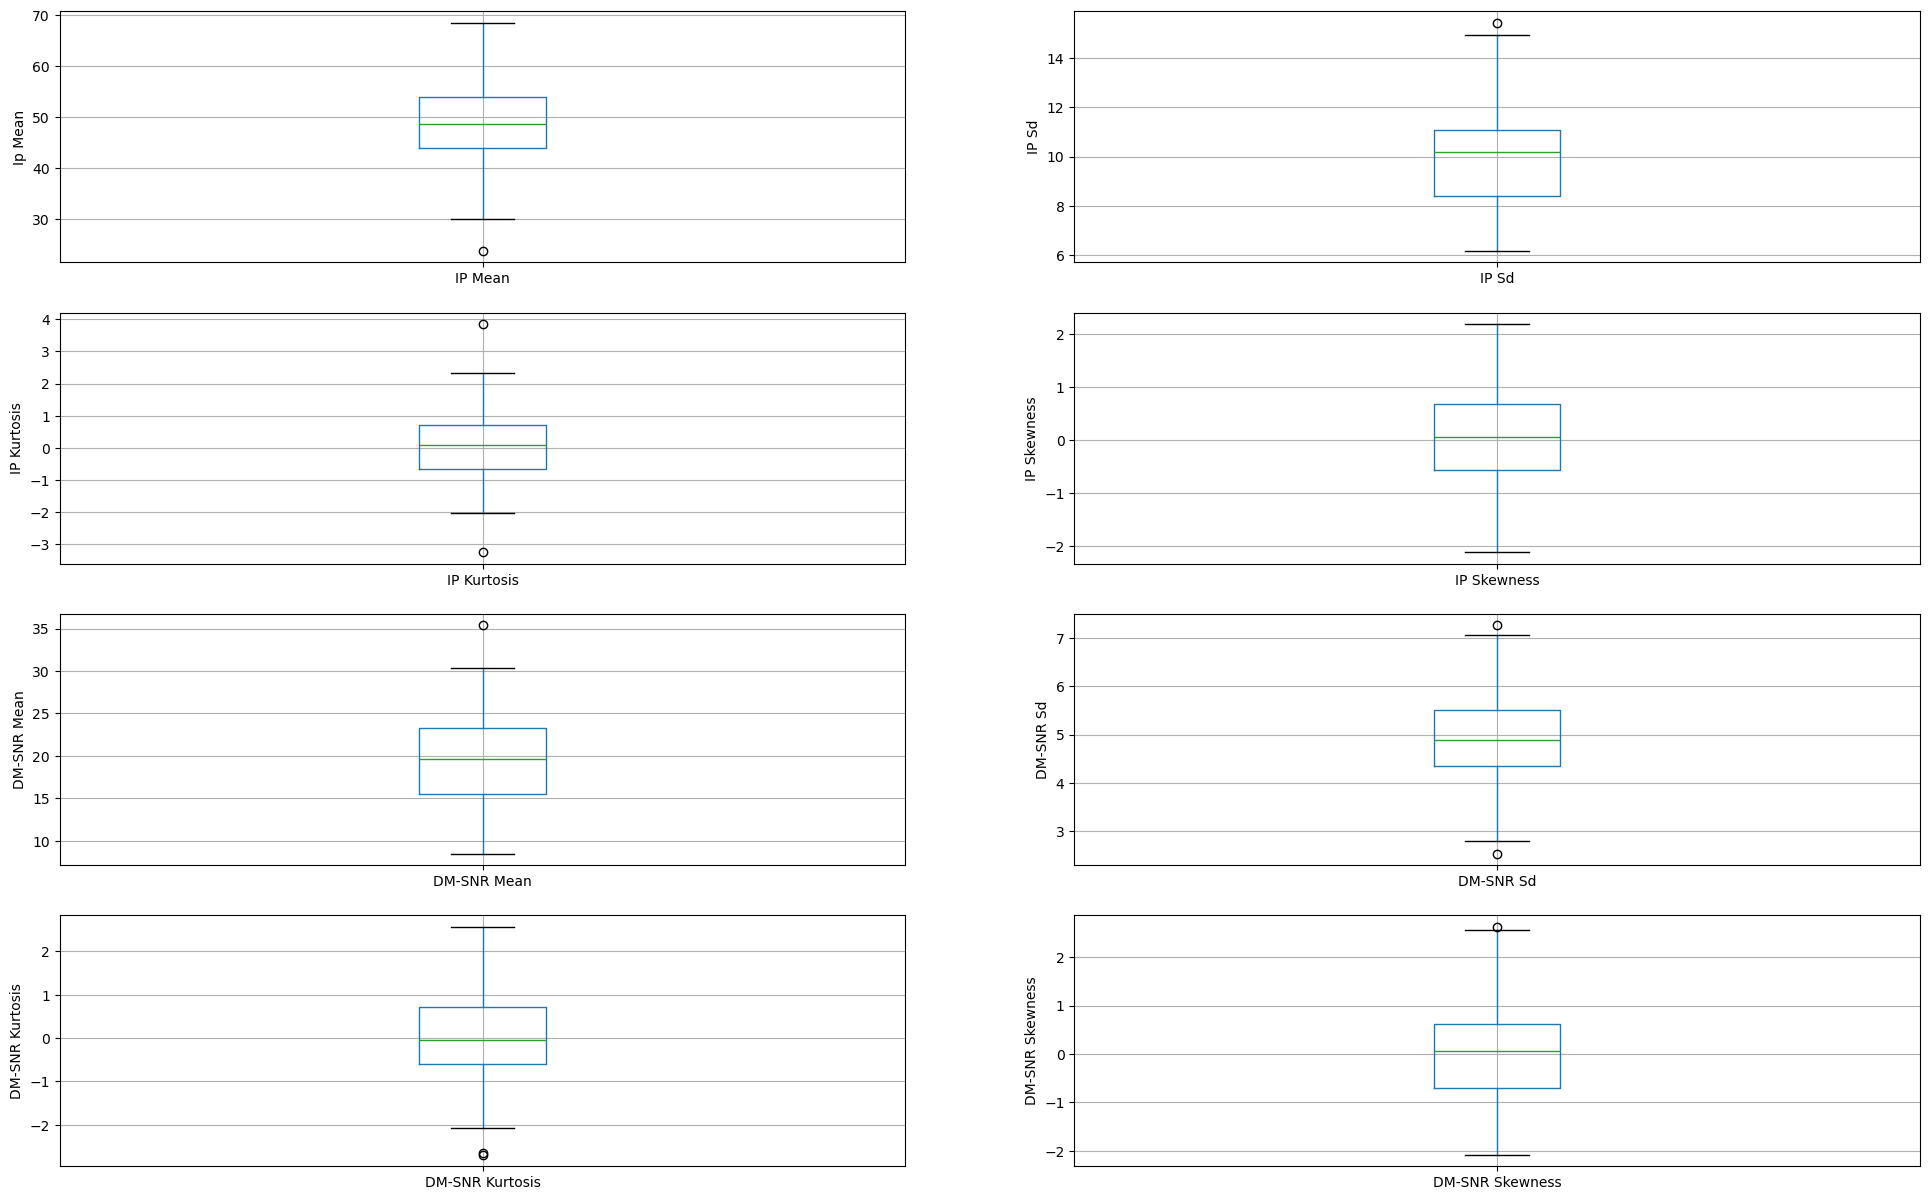

In [31]:
plt.figure(figsize=(24,15))

plt.subplot(4,2,1)
fig=df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('Ip Mean')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')


plt.show()

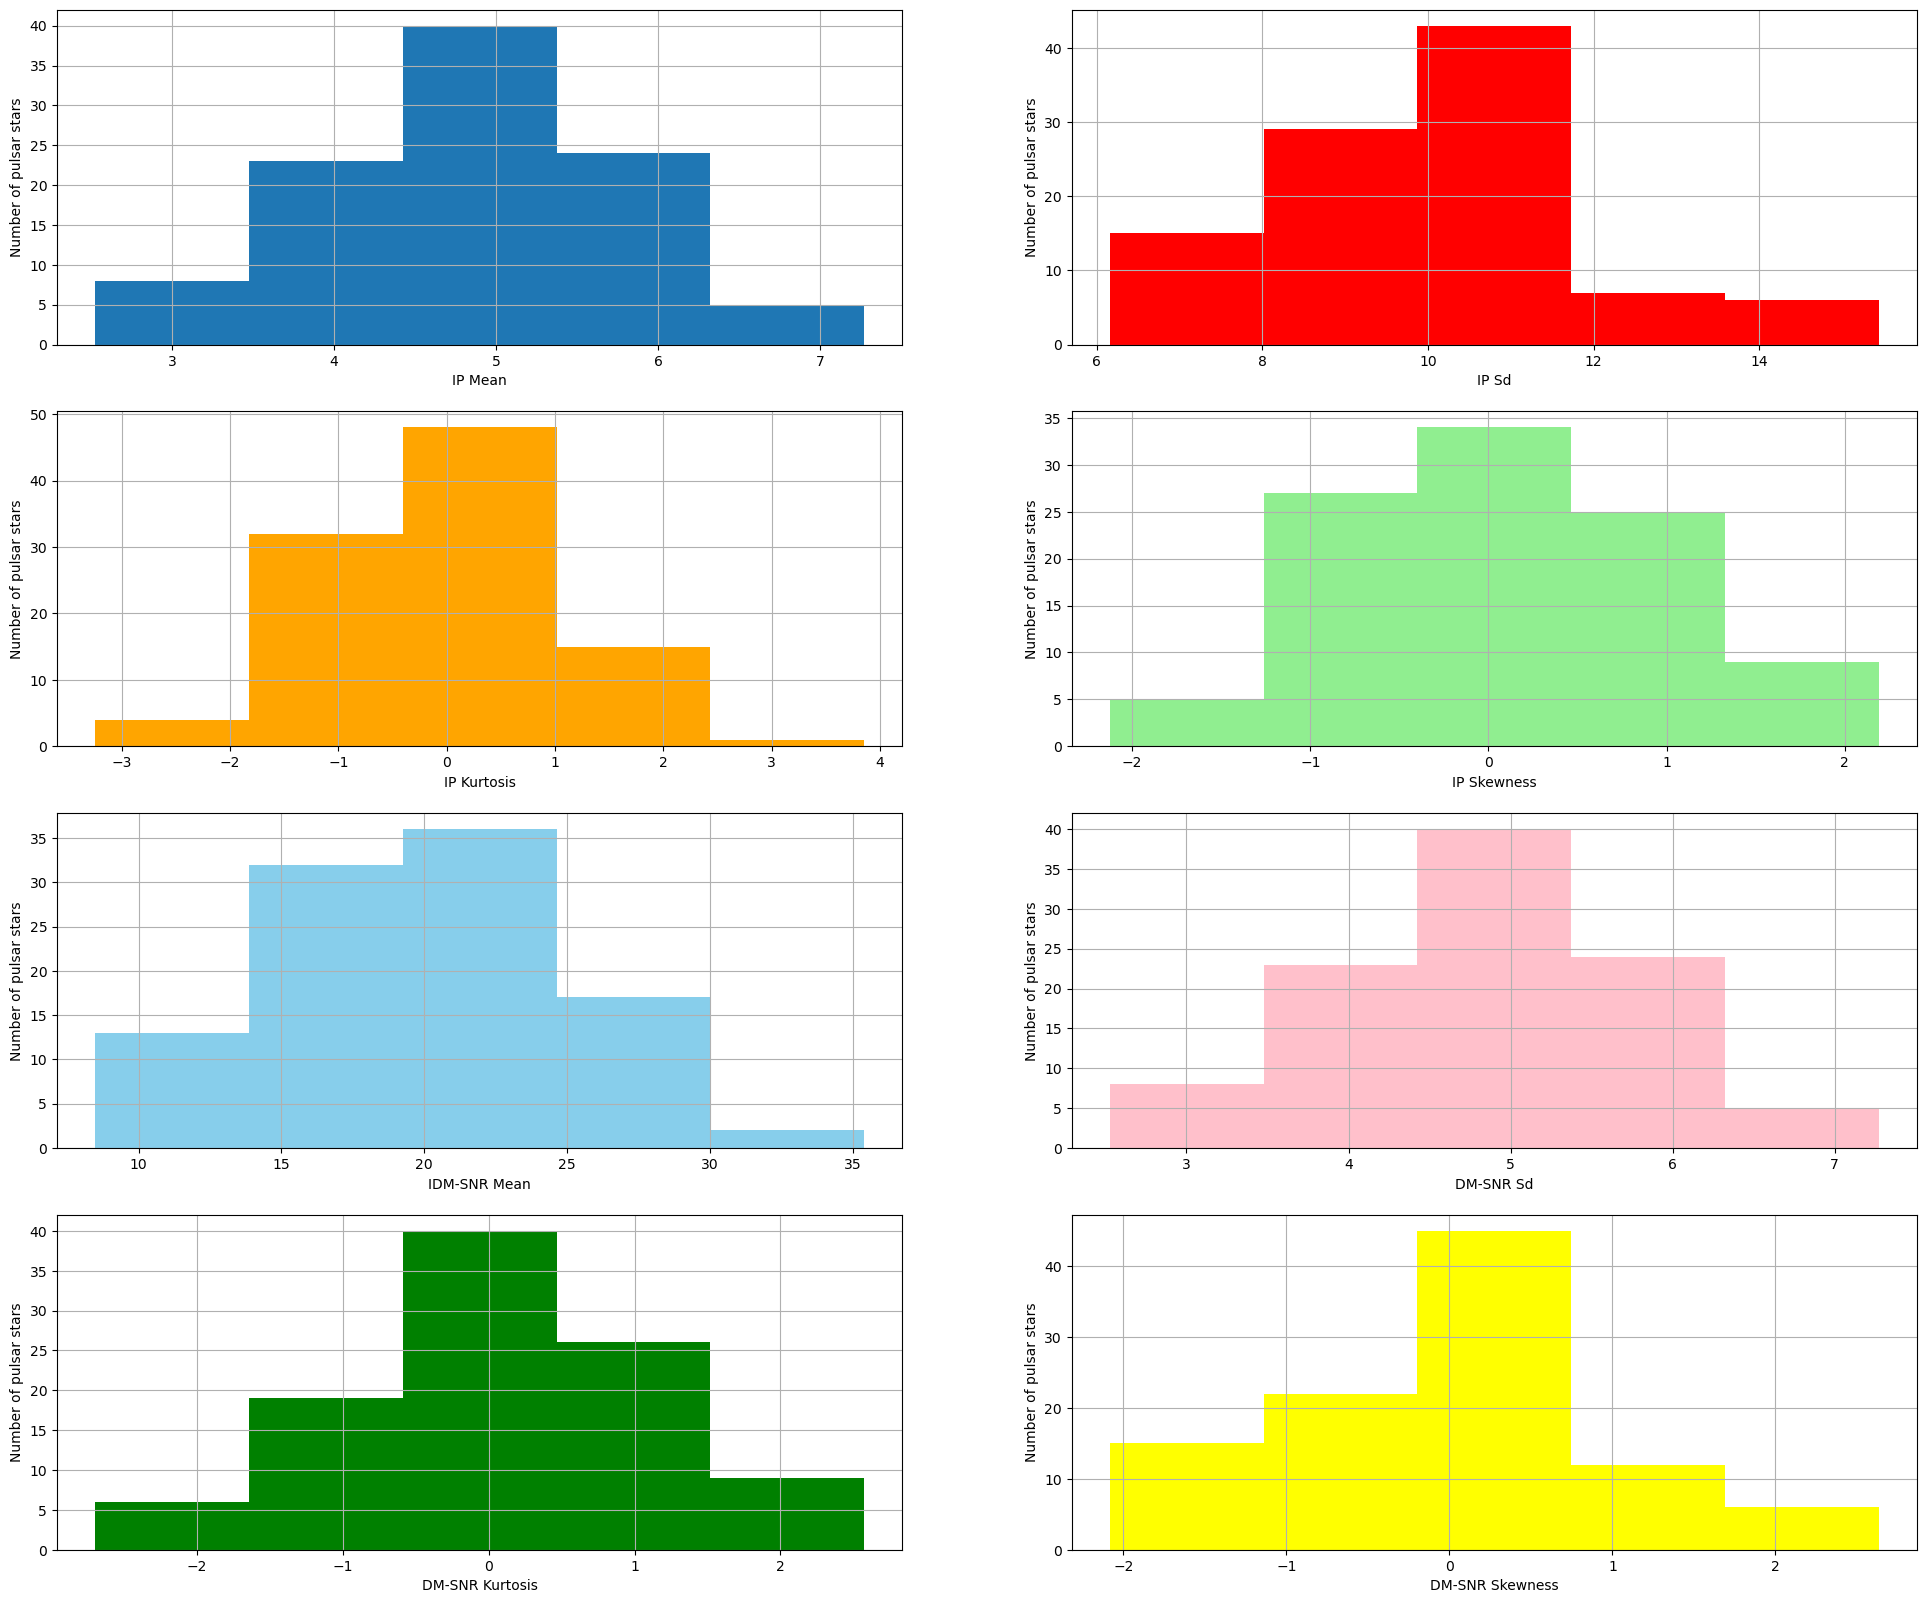

In [50]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = plt.hist(df['DM-SNR Sd'],bins=5)
fig=plt.grid()
plt.xlabel("IP Mean")
plt.ylabel("Number of pulsar stars")

plt.subplot(4, 2, 2)
fig = plt.hist(df['IP Sd'],bins=5,color='red')
plt.xlabel("IP Sd")
fig=plt.grid()
plt.ylabel("Number of pulsar stars")


plt.subplot(4, 2, 3)
fig = plt.hist(df['IP Kurtosis'],bins=5,color='orange')
plt.xlabel("IP Kurtosis")
fig=plt.grid()
plt.ylabel("Number of pulsar stars")

plt.subplot(4, 2, 4)
fig = plt.hist(df['IP Skewness'],bins=5,color='lightgreen')
plt.xlabel("IP Skewness")
fig=plt.grid()
plt.ylabel("Number of pulsar stars")

plt.subplot(4, 2, 5)
fig = plt.hist(df['DM-SNR Mean'],bins=5,color='skyblue')
plt.xlabel("IDM-SNR Mean")
fig=plt.grid()
plt.ylabel("Number of pulsar stars")

plt.subplot(4, 2, 6)
fig=plt.grid()
fig = plt.hist(df['DM-SNR Sd'],bins=5,color='pink')
plt.xlabel("DM-SNR Sd")
plt.ylabel("Number of pulsar stars")


plt.subplot(4, 2, 7)
fig=plt.grid()
fig = plt.hist(df['DM-SNR Kurtosis'],bins=5,color='green')
plt.xlabel("DM-SNR Kurtosis")
plt.ylabel("Number of pulsar stars")

plt.subplot(4, 2, 8)
fig = plt.hist(df['DM-SNR Skewness'],bins=5,color='yellow')
plt.xlabel("DM-SNR Skewness")
plt.ylabel("Number of pulsar stars")
fig=plt.grid()

plt.show()


# Declare feature vector and target variable

In [53]:
x = df.drop(['target_class'], axis=1)

y = df['target_class']

# Split data into separate training and test set

In [92]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=0)

In [62]:
x_train.shape, x_test.shape

((70, 8), (30, 8))

# Feature Scaling 

In [64]:
cols = x_train.columns
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [65]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [67]:
x_train.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
IP Mean,70.000000,-0.000000,1.007220,-2.855799,-0.435434,0.024122,0.601325,2.384318
IP Sd,70.000000,-0.000000,1.007220,-1.972798,-0.851694,0.038233,0.634927,2.849370
IP Kurtosis,70.000000,0.000000,1.007220,-1.893872,-0.693517,0.023559,0.602925,3.415256
IP Skewness,70.000000,-0.000000,1.007220,-2.159310,-0.775836,-0.059144,0.615848,2.445659
DM-SNR Mean,70.000000,0.000000,1.007220,-1.908115,-0.852795,-0.008674,0.714223,1.996253
DM-SNR Sd,70.000000,-0.000000,1.007220,-2.575868,-0.550054,-0.024444,0.678969,2.549465
DM-SNR Kurtosis,70.000000,0.000000,1.007220,-2.791801,-0.508595,-0.028315,0.591552,2.257244
DM-SNR Skewness,70.000000,0.000000,1.007220,-2.143203,-0.734339,0.156301,0.677190,2.046997


# Model training

Default hyperparameter means C=1.0,  kernel=`rbf` and gamma=`auto` among other parameters.

In [93]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(f"The accuiray score is:{accuracy_score(y_test,y_pred)}")

The accuiray score is:0.7333333333333333


 I will run SVM with kernel=rbf and C=100.0.

In [98]:
svc=SVC(C=100.0)
svc.fit(x_train,y_train)
y_pred1=svc.predict(x_test)
print(f"The accuiray score is:{accuracy_score(y_test,y_pred1)}")

The accuiray score is:0.7333333333333333


I will run SVM with kernel=rbf and C=1000.0.

In [96]:
svc=SVC(C=1000.0)
svc.fit(x_train,y_train)
y_pred2=svc.predict(x_test)
print(f"The accuiray score is:{accuracy_score(y_test,y_pred2)}")

The accuiray score is:0.7


In [101]:
# Default hyperparameter means C=1.0, kernel=linear  and gamma=auto among other parameters.

svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(f"The accuiray score for  C=1.0, kernel=linear is:{accuracy_score(y_test,y_pred)}")

svc=SVC(kernel='linear',C=100.0)
svc.fit(x_train,y_train)
y_pred1=svc.predict(x_test)
print(f"The accuiray score  C=100, kernel=linearis:{accuracy_score(y_test,y_pred1)}")

svc=SVC(kernel='linear',C=1000.0)
svc.fit(x_train,y_train)
y_pred2=svc.predict(x_test)
print(f"The accuiray score C=1000, kernel=linear is:{accuracy_score(y_test,y_pred2)}")



The accuiray score for  C=1.0, kernel=linear is:0.7333333333333333
The accuiray score  C=100, kernel=linearis:0.7333333333333333
The accuiray score C=1000, kernel=linear is:0.7333333333333333


In [106]:
# Default hyperparameter means C=1.0, kernel=ploy  and gamma=auto among other parameters.

svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(f"The accuiray score for  C=1.0, kernel=poly is:{accuracy_score(y_test,y_pred)}")

svc=SVC(kernel='poly',C=100.0)
svc.fit(x_train,y_train)
y_pred1=svc.predict(x_test)
print(f"The accuiray score  C=100, kernel=poly is:{accuracy_score(y_test,y_pred1)}")

svc=SVC(kernel='poly',C=1000.0)
svc.fit(x_train,y_train)
y_pred2=svc.predict(x_test)
print(f"The accuiray score C=1000, kernel=poly is:{accuracy_score(y_test,y_pred2)}")

The accuiray score for  C=1.0, kernel=poly is:0.7333333333333333
The accuiray score  C=100, kernel=poly is:0.7333333333333333
The accuiray score C=1000, kernel=poly is:0.7


In [107]:
# Default hyperparameter means C=1.0, kernel=sigmoid  and gamma=auto among other parameters.

svc=SVC(kernel='sigmoid')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(f"The accuiray score for  C=1.0, kernel=sigmoid is:{accuracy_score(y_test,y_pred)}")

svc=SVC(kernel='sigmoid',C=100.0)
svc.fit(x_train,y_train)
y_pred1=svc.predict(x_test)
print(f"The accuiray score  C=100, kernel=sigmoid is:{accuracy_score(y_test,y_pred1)}")

svc=SVC(kernel='sigmoid',C=1000.0)
svc.fit(x_train,y_train)
y_pred2=svc.predict(x_test)
print(f"The accuiray score C=1000, kernel=sigmoid is:{accuracy_score(y_test,y_pred2)}")

The accuiray score for  C=1.0, kernel=sigmoid is:0.7333333333333333
The accuiray score  C=100, kernel=sigmoid is:0.7333333333333333
The accuiray score C=1000, kernel=sigmoid is:0.7666666666666667


# Confusion matrix

In [113]:
cm=confusion_matrix(y_test,y_pred)
print(f"Confucion matrix is:'\n' ",cm)

Confucion matrix is:'
'  [[22  0]
 [ 8  0]]


<Axes: >

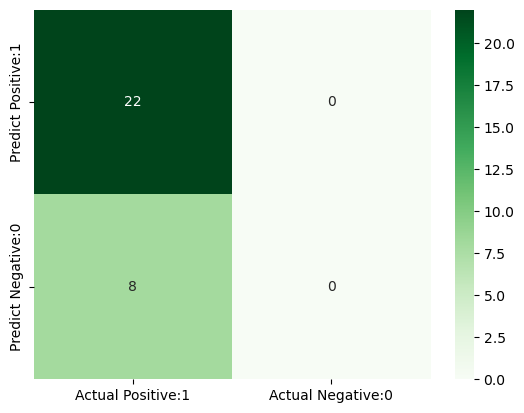

In [130]:
cm1 = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1,cmap="Greens",fmt='d',annot=True)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        22
           1       0.00      0.00      0.00         8

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



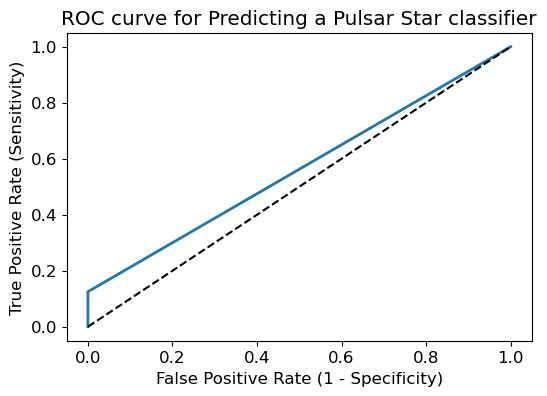

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


In [147]:
Cross_validated_ROC_AUC = cross_val_score(svc, x_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : nan


# Hyperparameter Optimization using GridSearch CV

In [159]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# import SVC classifier
from sklearn.svm import SVC

# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [157]:
# best score achieved during the GridSearchCV
print(f'GridSearch CV best score : {grid_search.best_score_}')


# print parameters that give the best results
print(f'Parameters that give the best results :{grid_search.best_params_}')


# print estimator that was chosen by the GridSearch
print(f'Estimator that was chosen by the search :{grid_search.best_estimator_}')

GridSearch CV best score : 0.9428571428571428
Parameters that give the best results :{'C': 1, 'kernel': 'linear'}
Estimator that was chosen by the search :SVC(C=1, kernel='linear')
